In [1]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importation des bibliothèques
import fonctions as f

In [3]:
df = f.pd.read_csv("data.csv", index_col=0)
df.head()

,DATE,RR,DRR,TN,HTN,TX,HTX,TM,TMNX,TNSOL,...,BRUME,ECLAIR,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06
POSTE,,,,,,,,,,,,,,,,,,,,,
1014002,20220105,"2,6",NaN,"-0,4",1759.0,"3,4",1217.0,"0,9","1,50",NaN,...,NaN,NaN,NaN,"0,4",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220106,"0,0",NaN,"-2,5",1746.0,"4,3",1327.0,"-0,6","0,90",NaN,...,NaN,NaN,NaN,"0,6",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220107,"10,0",NaN,"-6,9",718.0,"1,6",2229.0,"-1,2","-2,65",NaN,...,NaN,NaN,NaN,"0,0",NaN,NaN,NaN,NaN,0.0,NaN
1014002,20220108,"13,2",NaN,"-0,7",733.0,"6,3",2319.0,"2,4","2,80",NaN,...,NaN,NaN,NaN,"0,5",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220109,"7,6",NaN,"0,4",737.0,"2,2",601.0,"1,8","1,30",NaN,...,NaN,NaN,NaN,"0,1",NaN,NaN,NaN,NaN,0.0,0.0


In [4]:
#Suppression des doublons
df = df.drop_duplicates()

In [5]:
# Supprimer les colonnes où toutes les valeurs sont NaN
df_cleaned = df.dropna(axis=1, how='all')

print("\nDataFrame après suppression des colonnes vides :")
print(df_cleaned.head())


DataFrame après suppression des colonnes vides :
             DATE    RR    TN     HTN   TX     HTX    TM   TMNX     DG TAMPLI  \
POSTE                                                                           
1014002  20220105   2,6  -0,4  1759.0  3,4  1217.0   0,9   1,50  389.0    3,8   
1014002  20220106   0,0  -2,5  1746.0  4,3  1327.0  -0,6   0,90  964.0    6,8   
1014002  20220107  10,0  -6,9   718.0  1,6  2229.0  -1,2  -2,65  674.0    8,5   
1014002  20220108  13,2  -0,7   733.0  6,3  2319.0   2,4   2,80   87.0    7,0   
1014002  20220109   7,6   0,4   737.0  2,2   601.0   1,8   1,30    0.0    1,8   

         ...     HUN    UX     HUX  DHUMI40  DHUMI80 TSVM    UM  ETPGRILLE  \
POSTE    ...                                                                 
1014002  ...  1244.0  99.0   329.0      0.0   1157.0  5,7  88.0        0,4   
1014002  ...  1032.0  99.0  2304.0      0.0   1043.0  5,1  88.0        0,6   
1014002  ...   708.0  99.0   126.0      0.0   1440.0  5,4  96.0       

In [6]:
# Fonction pour convertir les chaînes avec des virgules en float
def convertir_virgule_en_float(serie):
    return f.pd.to_numeric(serie.str.replace(",", ".", regex=False), errors="coerce")

# Liste des colonnes à traiter
colonnes_a_corriger = ['RR', 'TN', 'TX', 'TM', 'TMNX', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'FXY', 'FXI3S', 'TSVM', 'ETPGRILLE']

# Application de la fonction sur les colonnes concernées
df_cleaned[colonnes_a_corriger] = df_cleaned[colonnes_a_corriger].apply(convertir_virgule_en_float)

In [7]:
# Définir les colonnes quantitatives
quantitative_columns = df_cleaned.drop(columns=['DATE']).select_dtypes(include=['float64', 'int64']).columns
quantitative_columns

Index(['RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM',
       'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN',
       'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE',
       'NEIGETOTX', 'NEIGETOT06'],
      dtype='object')

In [8]:
from sklearn.impute import SimpleImputer

# Définir les colonnes quantitatives
quantitative_columns = df_cleaned.drop(columns=['DATE']).select_dtypes(include=['float64', 'int64']).columns

# Initialiser l'imputeur avec la stratégie "médiane"
imputer = f.SimpleImputer(strategy='median')

# Appliquer l'imputation
df_cleaned[quantitative_columns] = imputer.fit_transform(df_cleaned[quantitative_columns])

# Vérifier que toutes les valeurs manquantes ont été imputées
print(df_cleaned[quantitative_columns].isnull().sum())


RR            0
TN            0
HTN           0
TX            0
HTX           0
TM            0
TMNX          0
DG            0
TAMPLI        0
TNTXM         0
FFM           0
FXI           0
DXI           0
HXI           0
FXY           0
DXY           0
HXY           0
FXI3S         0
HXI3S         0
UN            0
HUN           0
UX            0
HUX           0
DHUMI40       0
DHUMI80       0
TSVM          0
UM            0
ETPGRILLE     0
NEIGETOTX     0
NEIGETOT06    0
dtype: int64


In [9]:
df_cleaned.head()

,DATE,RR,TN,HTN,TX,HTX,TM,TMNX,DG,TAMPLI,...,HUN,UX,HUX,DHUMI40,DHUMI80,TSVM,UM,ETPGRILLE,NEIGETOTX,NEIGETOT06
POSTE,,,,,,,,,,,,,,,,,,,,,
1014002,20220105,2.6,-0.4,1759.0,3.4,1217.0,0.9,1.50,389.0,3.8,...,1244.0,99.0,329.0,0.0,1157.0,5.7,88.0,0.4,0.0,0.0
1014002,20220106,0.0,-2.5,1746.0,4.3,1327.0,-0.6,0.90,964.0,6.8,...,1032.0,99.0,2304.0,0.0,1043.0,5.1,88.0,0.6,0.0,0.0
1014002,20220107,10.0,-6.9,718.0,1.6,2229.0,-1.2,-2.65,674.0,8.5,...,708.0,99.0,126.0,0.0,1440.0,5.4,96.0,0.0,0.0,0.0
1014002,20220108,13.2,-0.7,733.0,6.3,2319.0,2.4,2.80,87.0,7.0,...,1403.0,99.0,618.0,0.0,1231.0,6.4,89.0,0.5,0.0,0.0
1014002,20220109,7.6,0.4,737.0,2.2,601.0,1.8,1.30,0.0,1.8,...,3.0,98.0,745.0,0.0,1440.0,6.5,94.0,0.1,0.0,0.0


In [10]:
df_c = df_cleaned

In [11]:
df_c['DATE'] = df_c['DATE'].astype(str)

In [12]:
df_c['DATE'].dtype

dtype('O')

In [13]:
df_c.head()

,DATE,RR,TN,HTN,TX,HTX,TM,TMNX,DG,TAMPLI,...,HUN,UX,HUX,DHUMI40,DHUMI80,TSVM,UM,ETPGRILLE,NEIGETOTX,NEIGETOT06
POSTE,,,,,,,,,,,,,,,,,,,,,
1014002,20220105,2.6,-0.4,1759.0,3.4,1217.0,0.9,1.50,389.0,3.8,...,1244.0,99.0,329.0,0.0,1157.0,5.7,88.0,0.4,0.0,0.0
1014002,20220106,0.0,-2.5,1746.0,4.3,1327.0,-0.6,0.90,964.0,6.8,...,1032.0,99.0,2304.0,0.0,1043.0,5.1,88.0,0.6,0.0,0.0
1014002,20220107,10.0,-6.9,718.0,1.6,2229.0,-1.2,-2.65,674.0,8.5,...,708.0,99.0,126.0,0.0,1440.0,5.4,96.0,0.0,0.0,0.0
1014002,20220108,13.2,-0.7,733.0,6.3,2319.0,2.4,2.80,87.0,7.0,...,1403.0,99.0,618.0,0.0,1231.0,6.4,89.0,0.5,0.0,0.0
1014002,20220109,7.6,0.4,737.0,2.2,601.0,1.8,1.30,0.0,1.8,...,3.0,98.0,745.0,0.0,1440.0,6.5,94.0,0.1,0.0,0.0


In [14]:
# Convertir 'DATE' en type datetime
df_c['DATE'] = f.pd.to_datetime(df_c['DATE'], format='%Y%m%d')

In [15]:
df_c.head()

,DATE,RR,TN,HTN,TX,HTX,TM,TMNX,DG,TAMPLI,...,HUN,UX,HUX,DHUMI40,DHUMI80,TSVM,UM,ETPGRILLE,NEIGETOTX,NEIGETOT06
POSTE,,,,,,,,,,,,,,,,,,,,,
1014002,2022-01-05,2.6,-0.4,1759.0,3.4,1217.0,0.9,1.50,389.0,3.8,...,1244.0,99.0,329.0,0.0,1157.0,5.7,88.0,0.4,0.0,0.0
1014002,2022-01-06,0.0,-2.5,1746.0,4.3,1327.0,-0.6,0.90,964.0,6.8,...,1032.0,99.0,2304.0,0.0,1043.0,5.1,88.0,0.6,0.0,0.0
1014002,2022-01-07,10.0,-6.9,718.0,1.6,2229.0,-1.2,-2.65,674.0,8.5,...,708.0,99.0,126.0,0.0,1440.0,5.4,96.0,0.0,0.0,0.0
1014002,2022-01-08,13.2,-0.7,733.0,6.3,2319.0,2.4,2.80,87.0,7.0,...,1403.0,99.0,618.0,0.0,1231.0,6.4,89.0,0.5,0.0,0.0
1014002,2022-01-09,7.6,0.4,737.0,2.2,601.0,1.8,1.30,0.0,1.8,...,3.0,98.0,745.0,0.0,1440.0,6.5,94.0,0.1,0.0,0.0


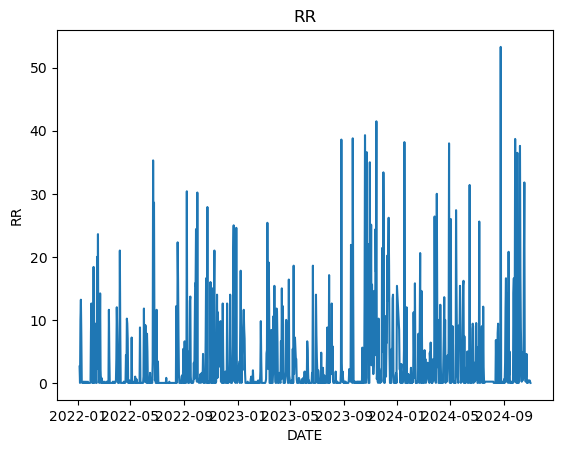

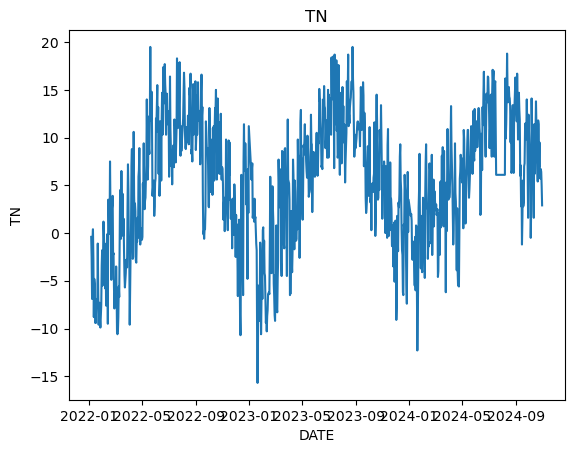

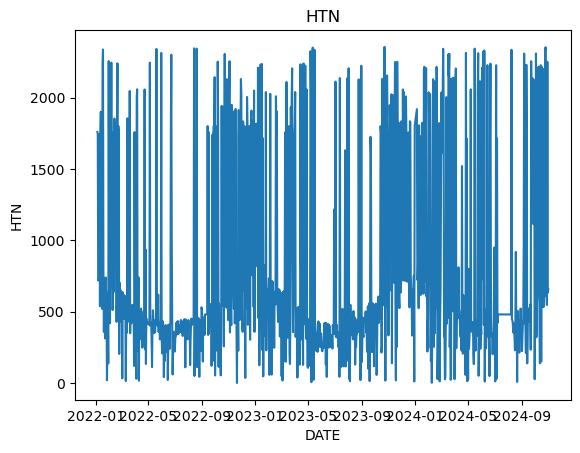

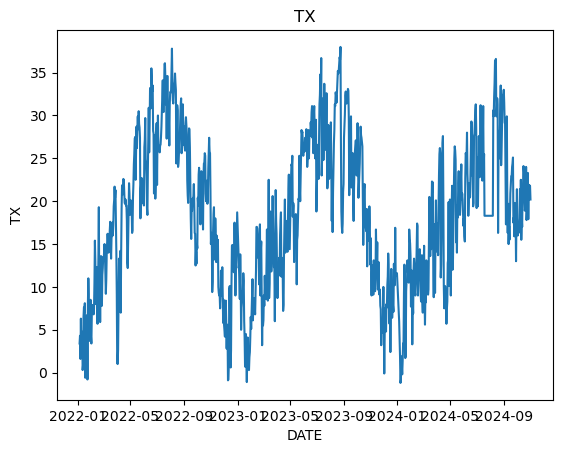

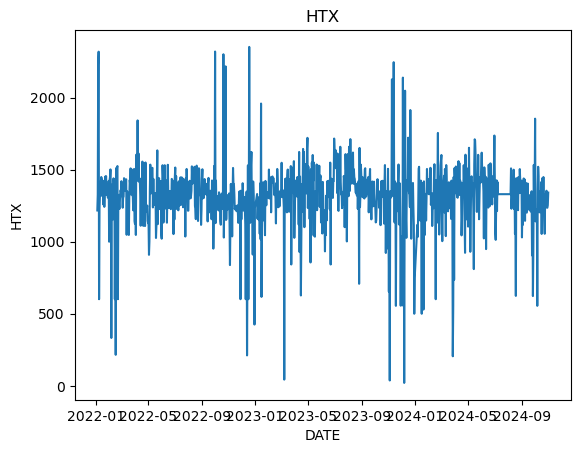

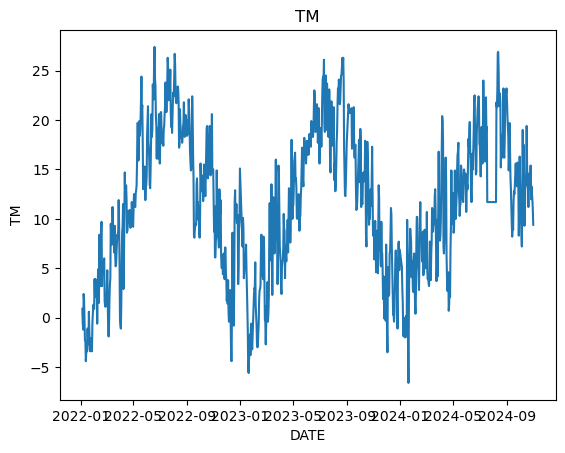

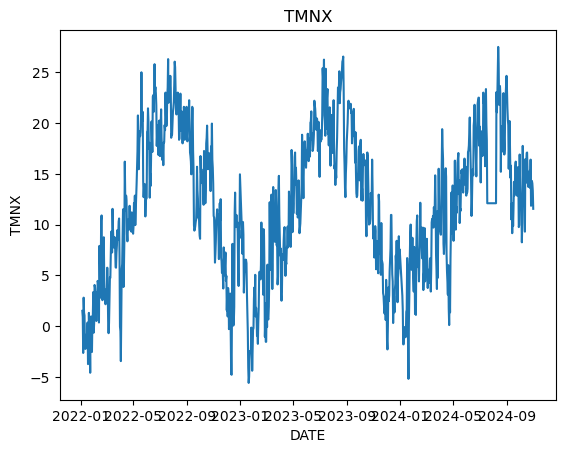

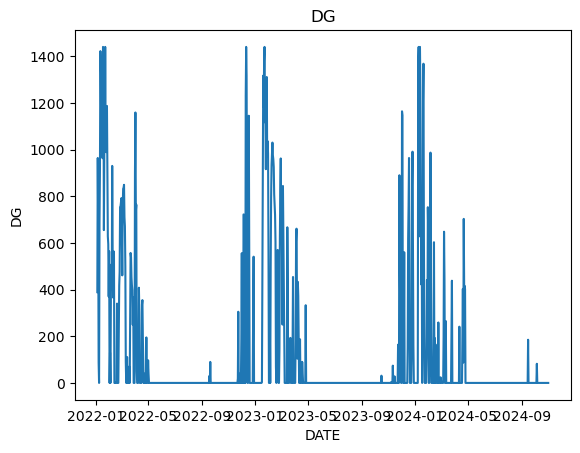

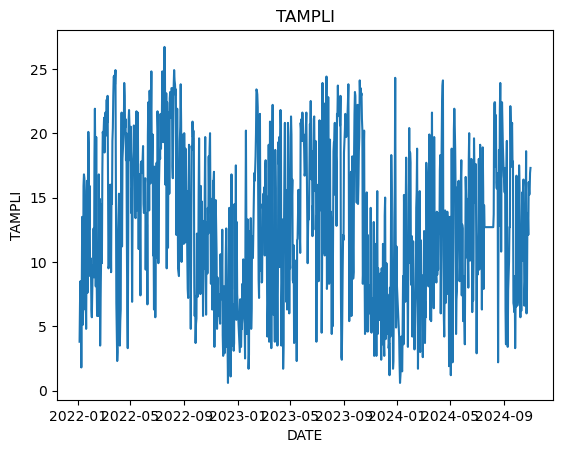

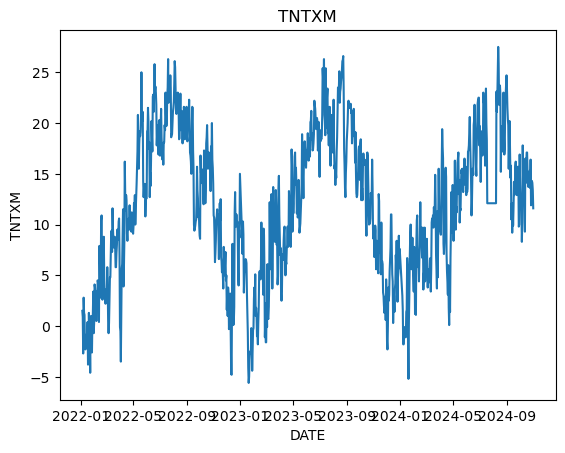

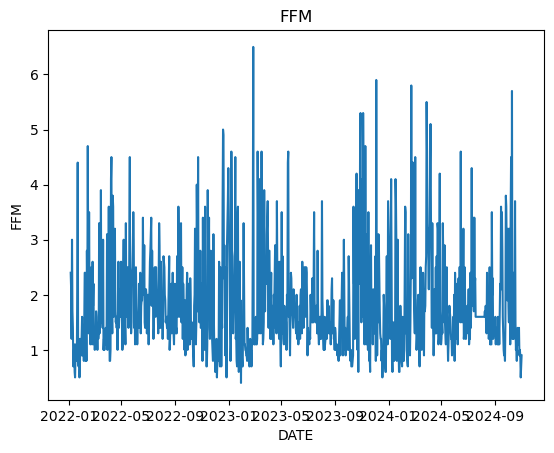

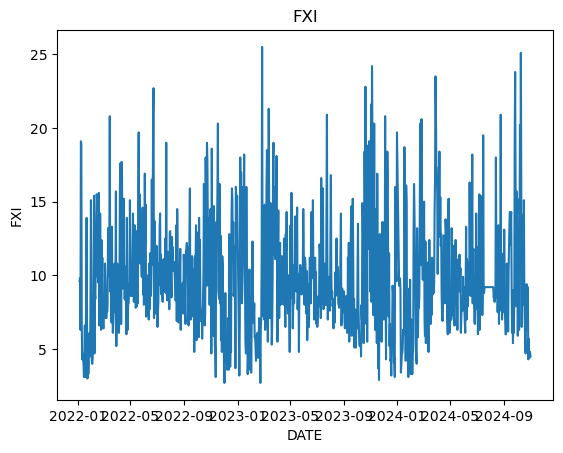

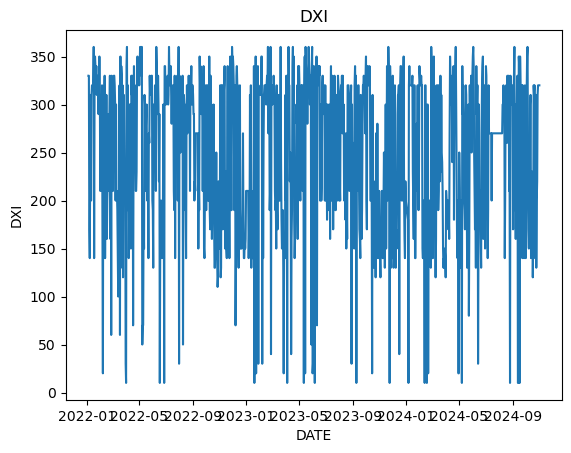

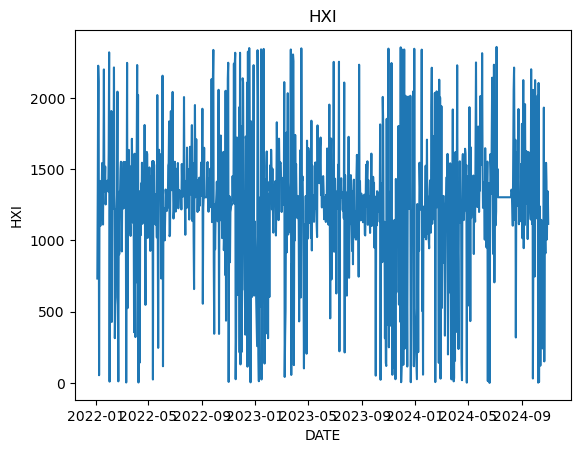

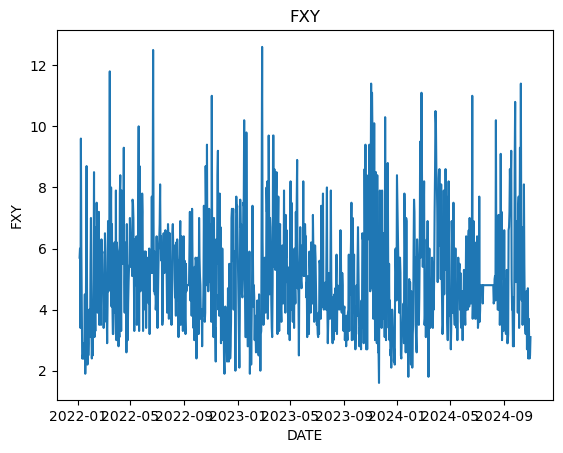

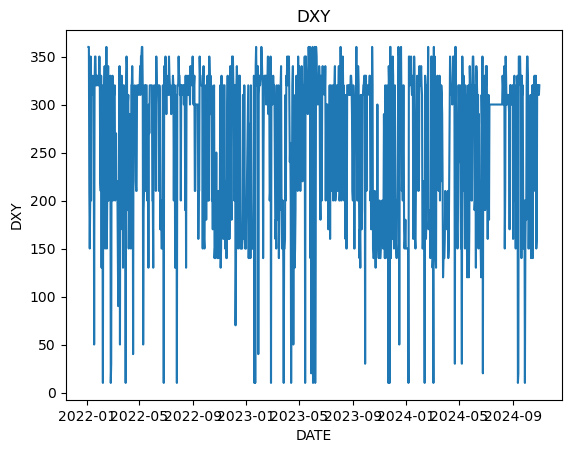

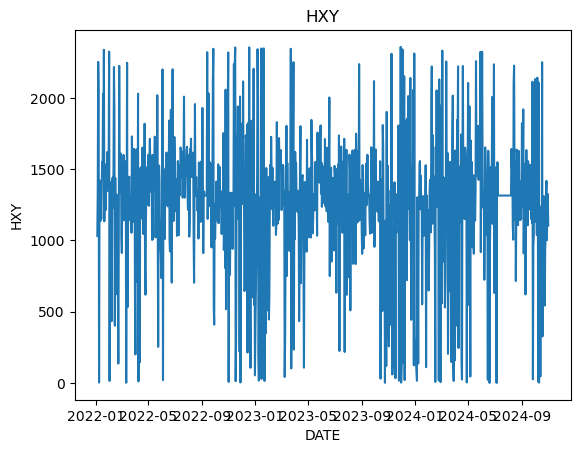

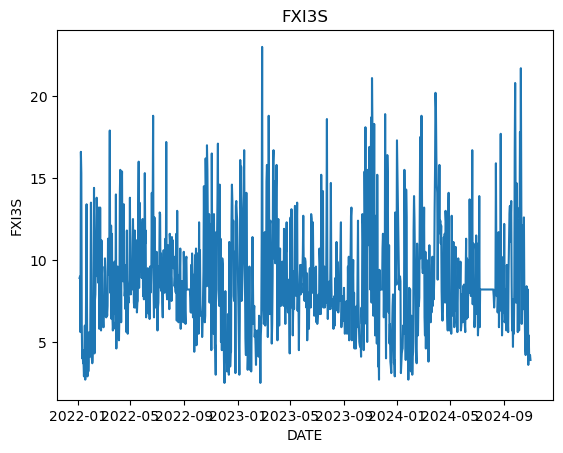

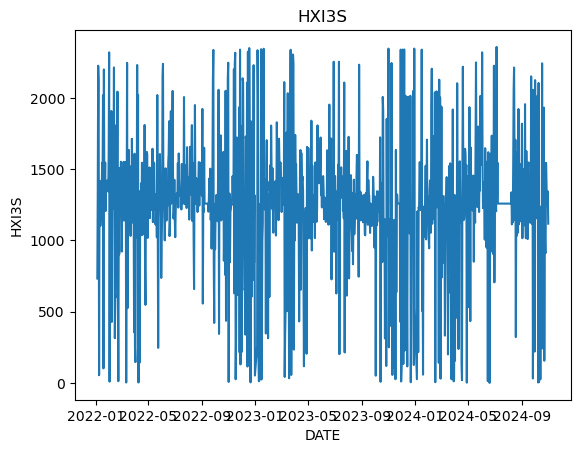

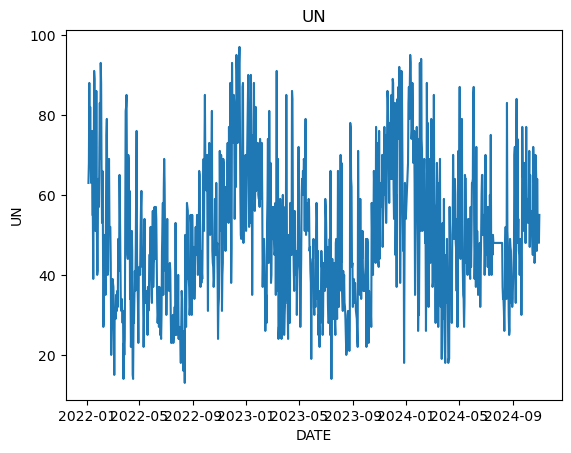

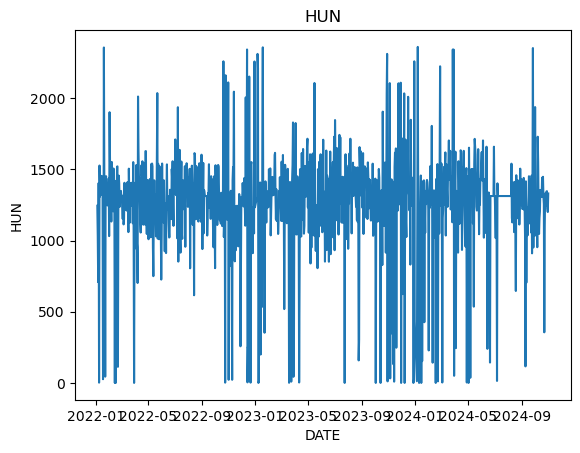

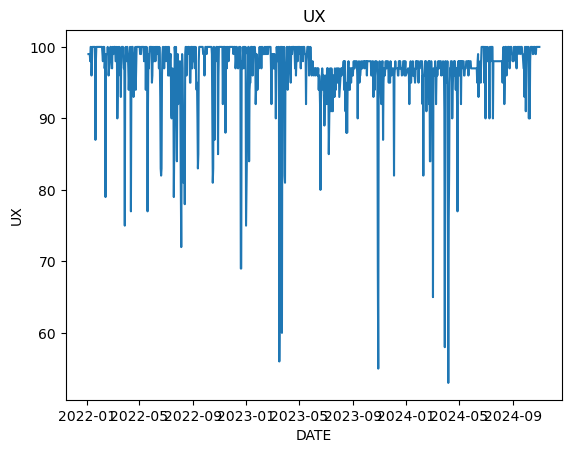

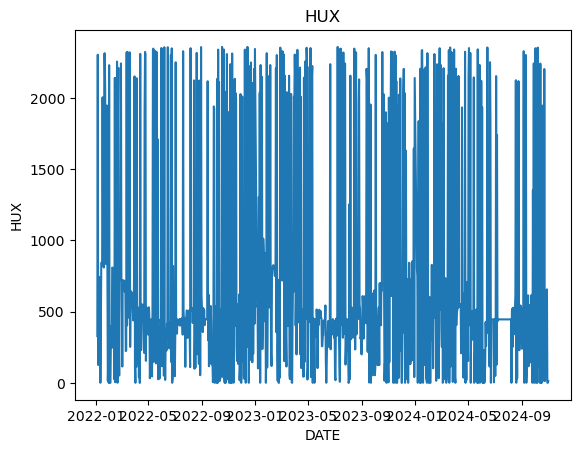

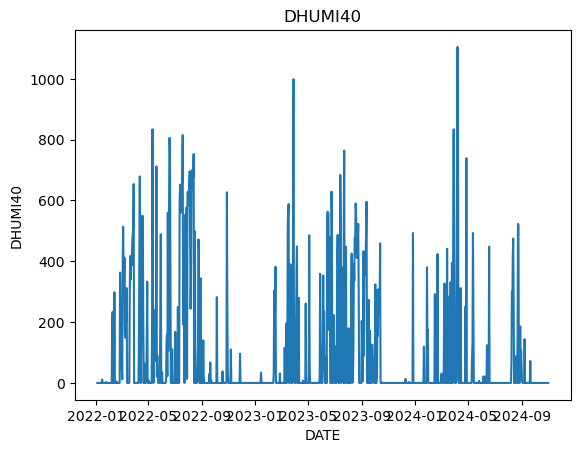

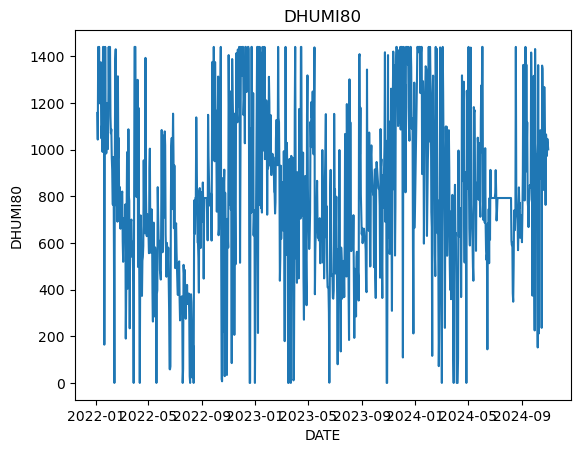

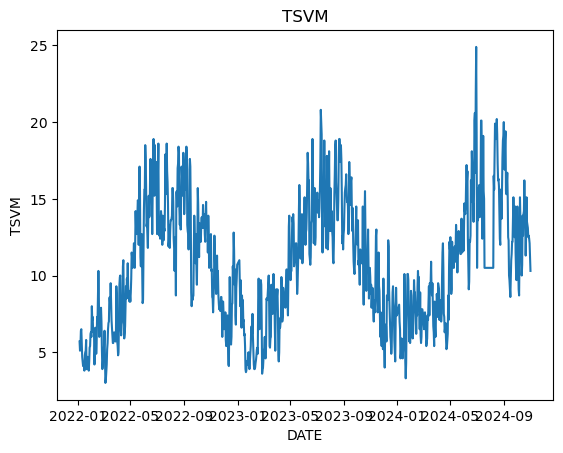

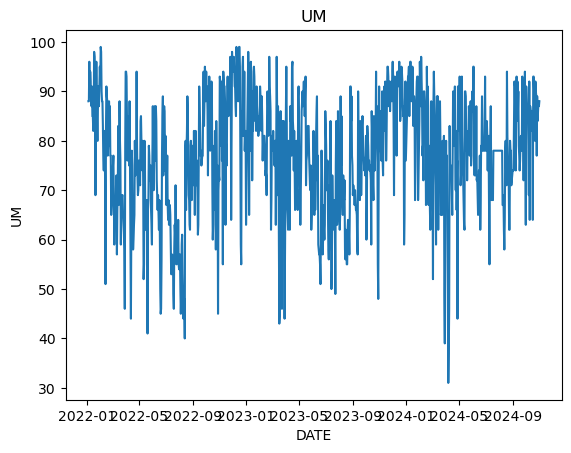

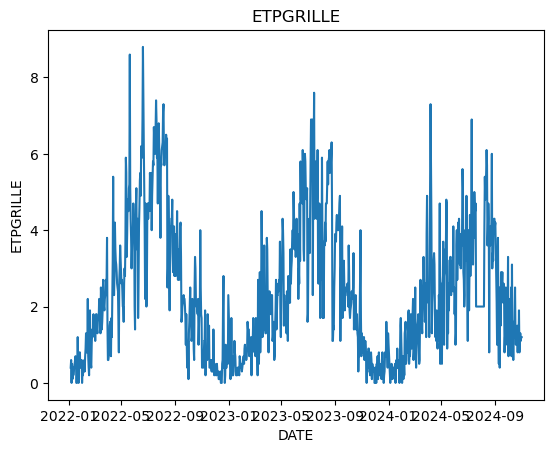

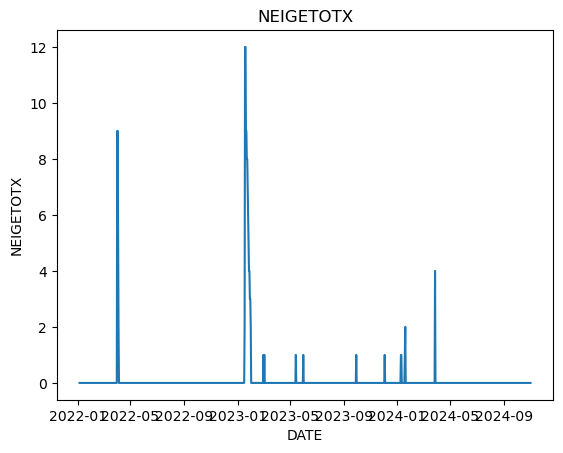

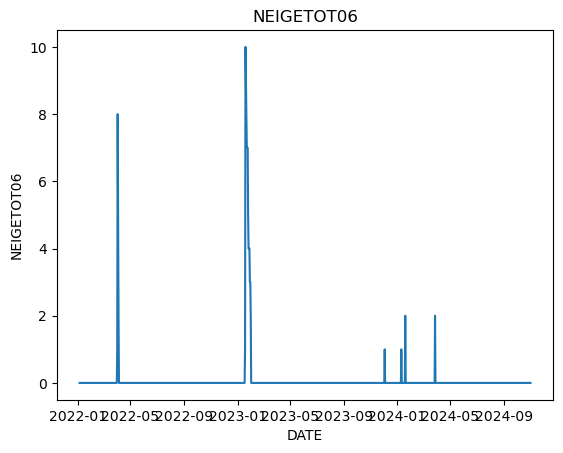

In [16]:
# Visualizing the behavior of all columns
columns = df_c.drop(columns=['DATE']).columns
for column in columns:
    f.sns.lineplot(x=df_c['DATE'], y=df_c[column])
    f.plt.title(column)
    f.plt.show()

In [17]:
# Function to convert our dataset in a time series dataset
def create_window(target, feature, window=1, offset=0):
    feature_new, target_new = [], []
    feature_np = feature.to_numpy()
    target_np = target.to_numpy()
    for i in range(window, target.shape[0] - offset):
        feature_list = feature_np[i - window:i]
        feature_new.append(feature_list.reshape(window, feature_np.shape[1]))
        target_new.append(target_np[i+offset].reshape(1))
    return np.array(feature_new), np.array(target_new)

In [18]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 76.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 96.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 89.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow import nn

2024-12-27 10:17:33.582516: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-27 10:17:33.586578: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-27 10:17:33.596603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735294653.615484    9363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735294653.620845    9363 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-27 10:17:33.646769: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [20]:
# scale all the dataset (not including the date)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_c.drop(columns='DATE'))
df_scaled = pd.DataFrame(df_scaled, columns=df_c.drop(columns='DATE').columns)

# Set the window to 10
window = 10
feature_columns = ['RR', 'TN', 'HTN', 'DG', 'TAMPLI',
       'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN',
       'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE',
       'NEIGETOTX', 'NEIGETOT06']

# Create a window with all the columns as features (excluding the date)
feature, target = create_window(df_scaled['TM'],df_scaled[feature_columns], window=window)
print(feature[0])
print(target[0])
print(df_scaled.head(12))

[[-1.45555566e-01 -8.75832838e-01  1.40001758e+00  8.34363864e-01
  -1.52458447e+00  6.03369147e-01 -7.46105629e-02  9.78041010e-01
  -1.06665514e+00  3.34492734e-01  1.20920809e+00 -4.98220526e-01
   3.32505020e-02 -1.06396840e+00  7.60913731e-01 -2.02201216e-02
   4.23006718e-01 -5.20901580e-01 -4.88202398e-01  9.55055047e-01
  -1.25716261e+00  9.00249163e-01 -1.12346998e+00 -1.36105786e-01
  -1.24370697e-01]
 [-5.10261131e-01 -1.19348597e+00  1.38118879e+00  2.70707050e+00
  -1.02468863e+00  2.81865879e-01 -2.27208077e-02  9.78041010e-01
   1.99264271e-01  5.01466802e-01  1.20920809e+00  1.93693996e-01
   6.35645190e-02  2.03431801e-01  1.05151681e+00 -5.73652717e-01
   4.23006718e-01  2.11202990e+00 -4.88202398e-01  6.34599229e-01
  -1.40751018e+00  9.00249163e-01 -1.00935316e+00 -1.36105786e-01
  -1.24370697e-01]
 [ 8.92452579e-01 -1.85904493e+00 -1.07733341e-01  1.76257498e+00
  -7.41414327e-01 -6.82643926e-01 -9.30791524e-01 -9.08362221e-01
   2.01361132e+00 -9.45641784e-01 -5.7

In [24]:
# Standardizing the size of all images 
mpl.rcParams['figure.figsize'] = (15,9)
mpl.rcParams['font.size'] = 15

In [25]:
# Function to create train and test datasets
def train_test(feature, target, perc_train = 0.8):
    size_train = int(len(feature) * perc_train)

    x_train = feature[0:size_train]
    y_train = target[0:size_train]

    x_test = feature[size_train: len(feature)]
    y_test = target[size_train: len(feature)]

    return x_train, x_test, y_train, y_test

<Axes: xlabel='DATE'>

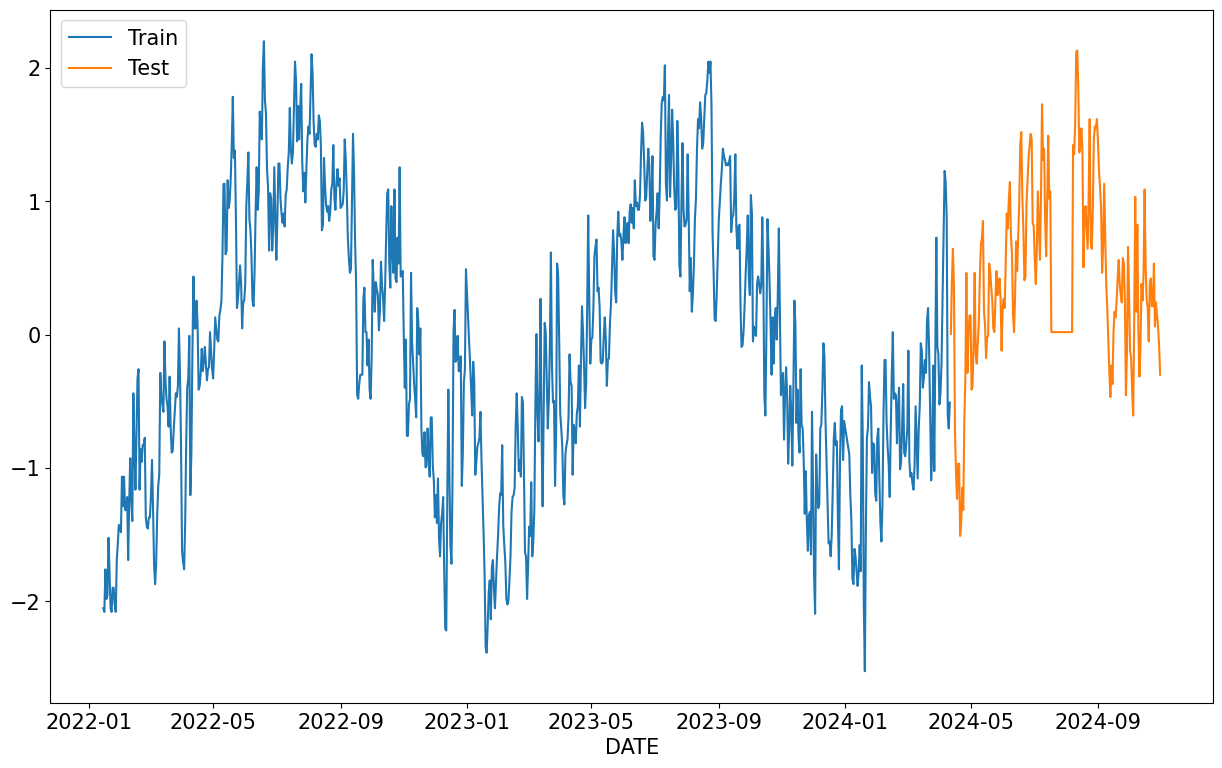

In [26]:
x_train, x_test, y_train, y_test = train_test(feature, target)

# Visualize the train and test data
sns.lineplot(x=df_c['DATE'].iloc[window:len(y_train) + window], y=y_train[:,0], label='Train')
sns.lineplot(x=df_c['DATE'].iloc[window + len(y_train):], y=y_test[:,0], label='Test')

**Prediction**

*Using all the features*

In [27]:
# Create a standard model using LSTM
def model_lstm(x_shape):

    model = keras.Sequential()
    model.add(keras.layers.LSTM(64, input_shape=(x_shape[1], x_shape[2])))
    model.add(keras.layers.Dense(units=1))

    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    return model

In [28]:
model = model_lstm(x_train.shape)
model.summary()

2024-12-22 10:24:45.212321: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,105 (90.25 KB)

 Trainable params: 23,105 (90.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.4487 - val_loss: 0.2598
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1829 - val_loss: 0.2151
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1560 - val_loss: 0.1915
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1251 - val_loss: 0.1872
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1032 - val_loss: 0.1771
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1018 - val_loss: 0.1639
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0974 - val_loss: 0.1610
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0966 - val_loss: 0.1572
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0871 - val_loss: 0.1809
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0688 - val_loss: 0.1569
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0817 - val_loss: 0.1749
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0

In [105]:
# Function to print the results of the fit process
def print_loss(result):
    f.plt.plot(result.history['loss'])
    f.plt.plot(result.history['val_loss'])
    f.plt.legend(['Train', 'Test'])
    f.plt.xlabel('Epochs')
    f.plt.ylabel('Cost')
    f.plt.show()

# Function to print the y_predicted compared with the y_test
def print_test_x_prediction(y_test, y_predict, df_date, train_size, window=0):
    f.sns.lineplot(x=df_date.iloc[train_size + window:], y=y_test[:,0], label = 'Test')
    f.sns.lineplot(x=df_date.iloc[train_size + window:], y=y_predict[:,0], label = 'Predict')
    f.plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


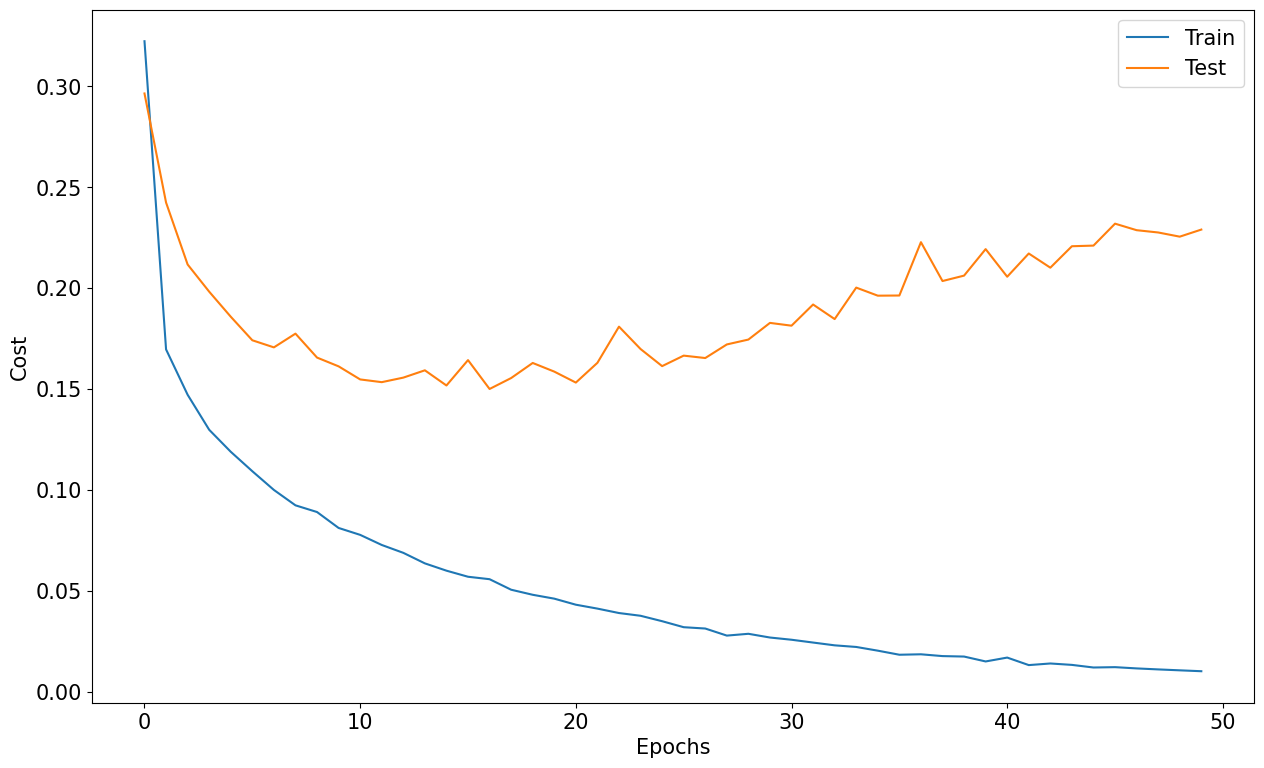

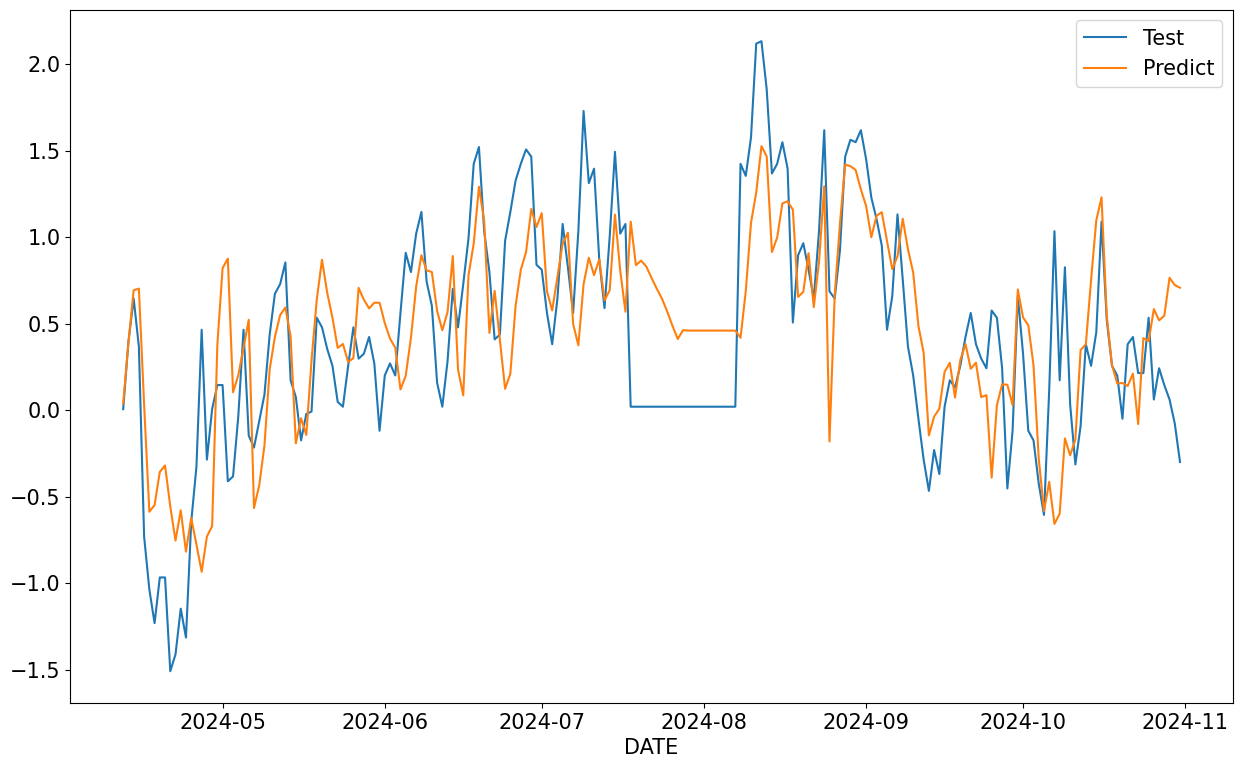

In [106]:
y_predict = model.predict(x_test)

print_loss(result)
print_test_x_prediction(y_test, y_predict, df_c['DATE'], len(y_train), window=window)

*Using only the target*

In [107]:
feature, target = create_window(df_scaled['TM'], df_scaled[['TM']], window=10)

x_train, x_test, y_train, y_test = train_test(feature, target)

model = model_lstm(x_train.shape)
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.4647 - val_loss: 0.2619
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2367 - val_loss: 0.2469
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2092 - val_loss: 0.2290
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1983 - val_loss: 0.2188
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1789 - val_loss: 0.1932
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1879 - val_loss: 0.1945
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1607 - val_loss: 0.1817
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1547 - val_loss: 0.1749
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1563 - val_loss: 0.1657
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1356 - val_loss: 0.1565
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1433 - val_loss: 0.1418
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


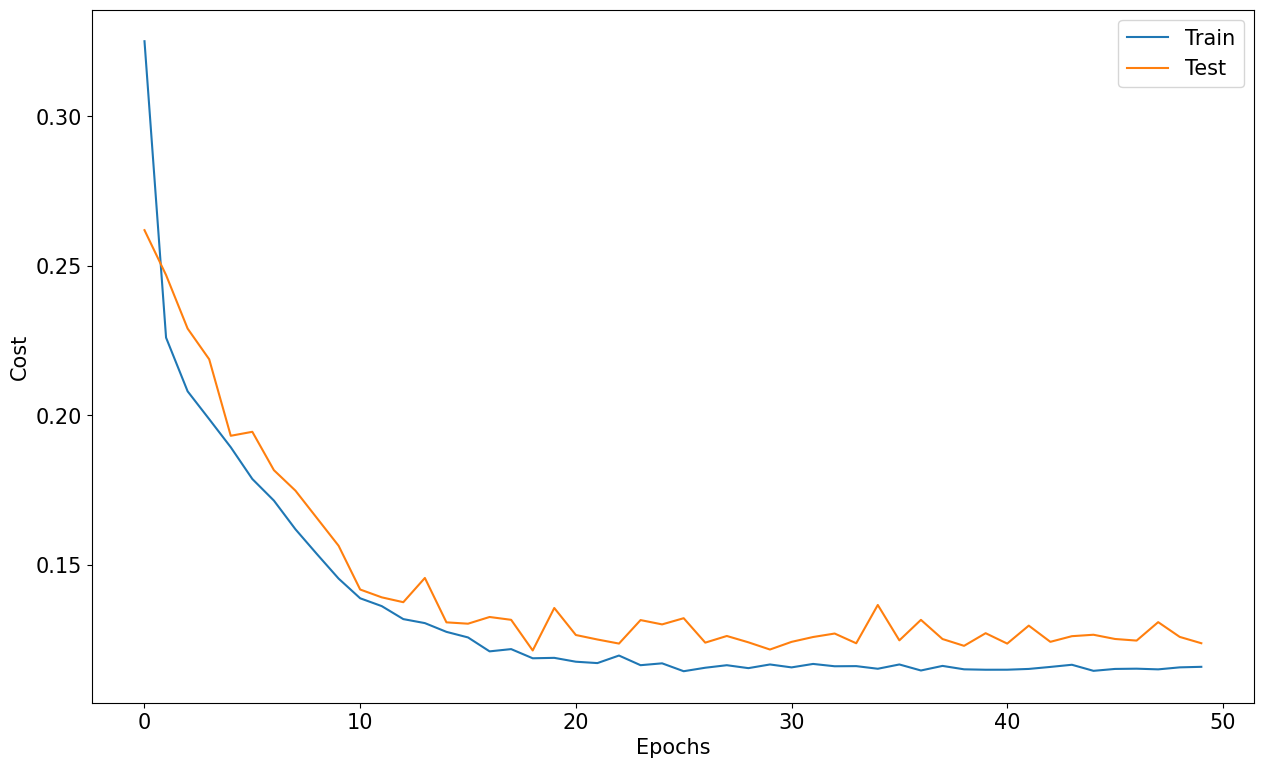

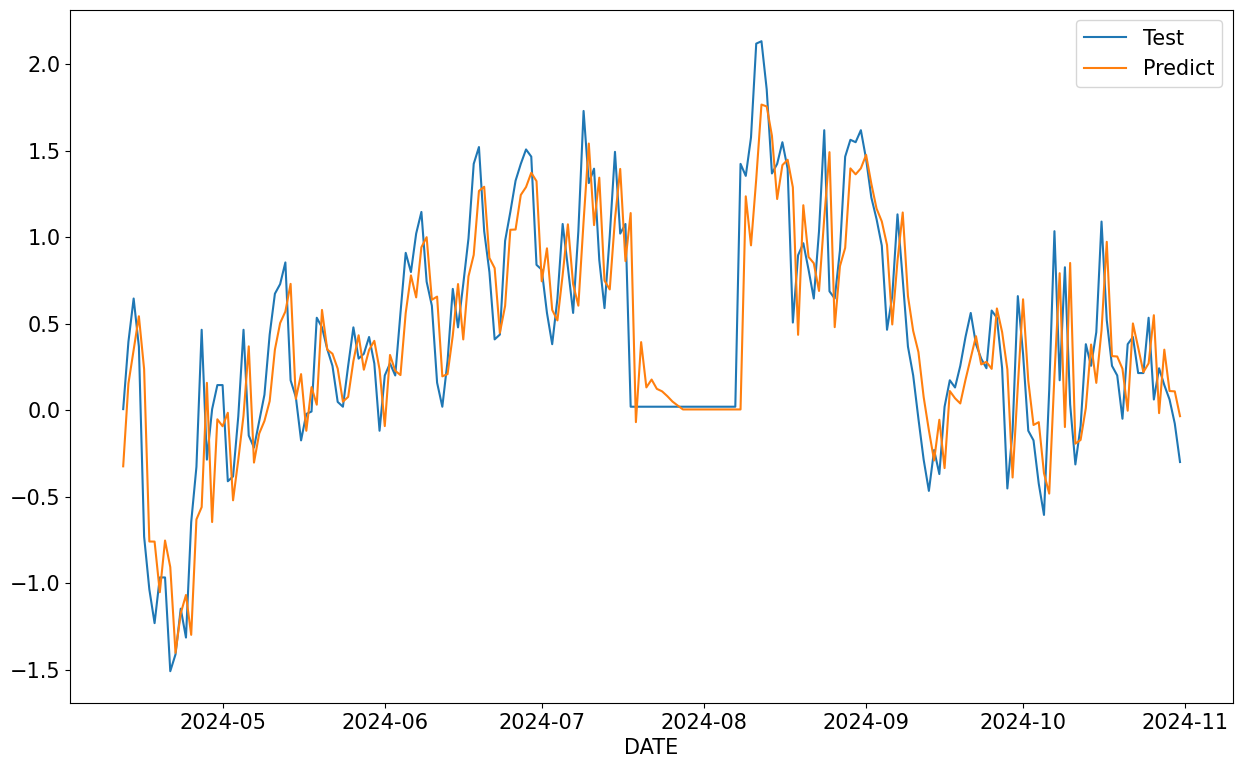

In [108]:
y_predict = model.predict(x_test)

print_loss(result)
print_test_x_prediction(y_test, y_predict, df_c['DATE'], len(y_train), window=window)

In [116]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)

Shape of X_train: (809, 10)
Shape of X_test: (203, 10, 1)


In [121]:
# Supposons que X est de forme (10, 5, 1)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])  # Transformer en (10, 5)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1])

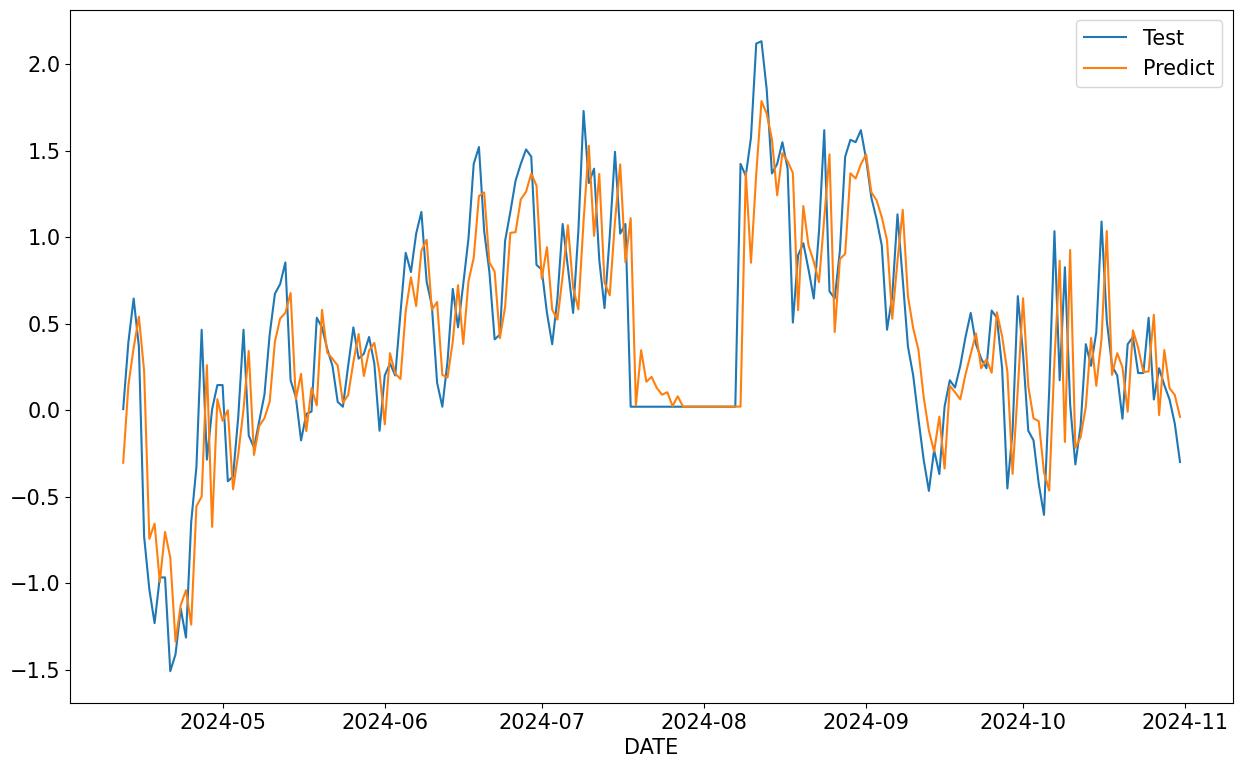

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_linear_reg = LinearRegression().fit(x_train, y_train)
y_predict = model_linear_reg.predict(x_test)


print_test_x_prediction(y_test, y_predict, df_c['DATE'], len(y_train), window=window)

In [126]:
y_pred.shape

(205,)

In [128]:
y_test.shape

(203, 1)

In [ ]:
# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

<Axes: xlabel='DATE'>

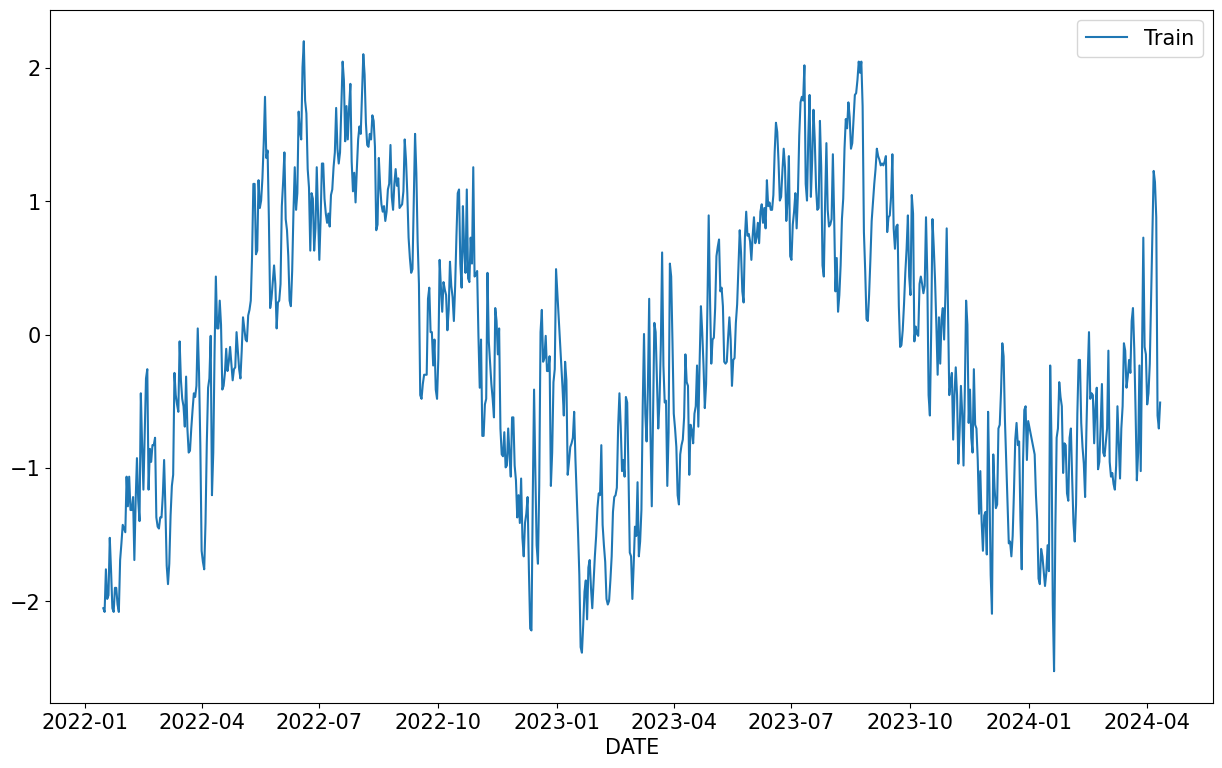

In [31]:
sns.lineplot(x=df_c['DATE'].iloc[window:len(y_train) + window], y=y_train[:,0], label='Train')

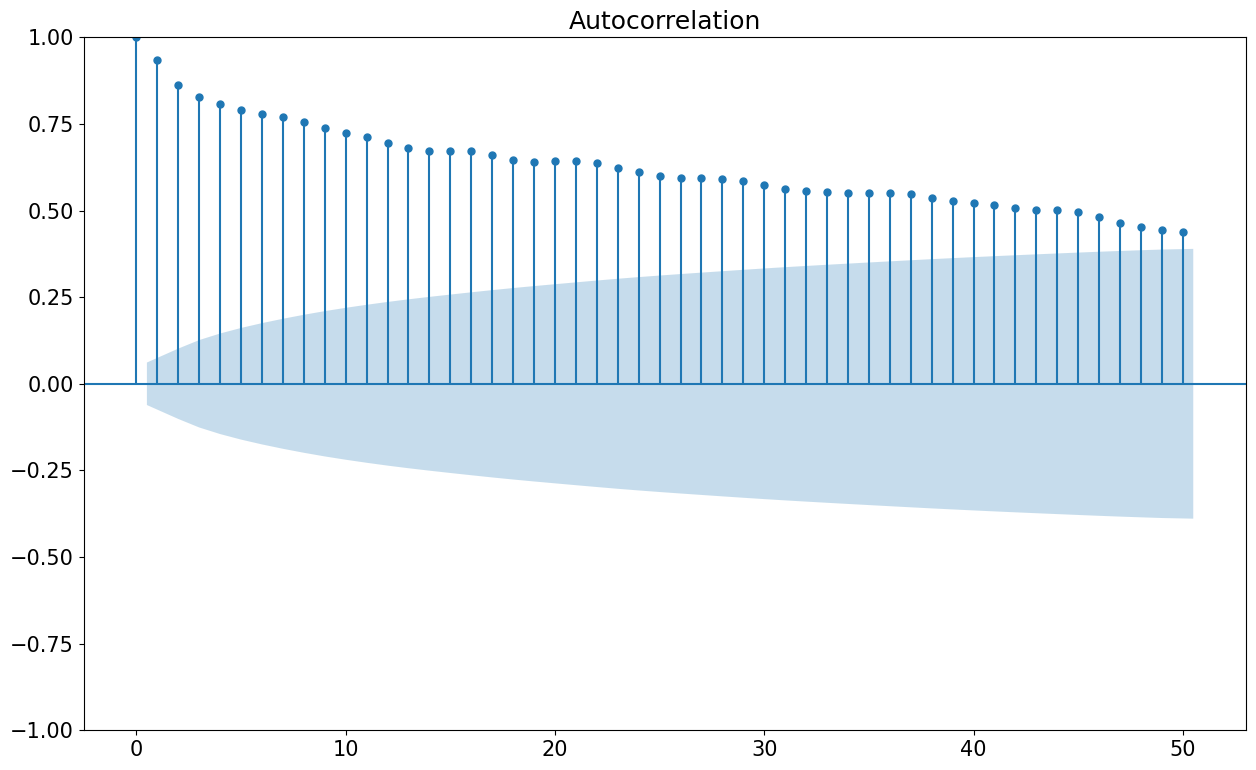

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_c['TM'], lags=50)
plt.show()


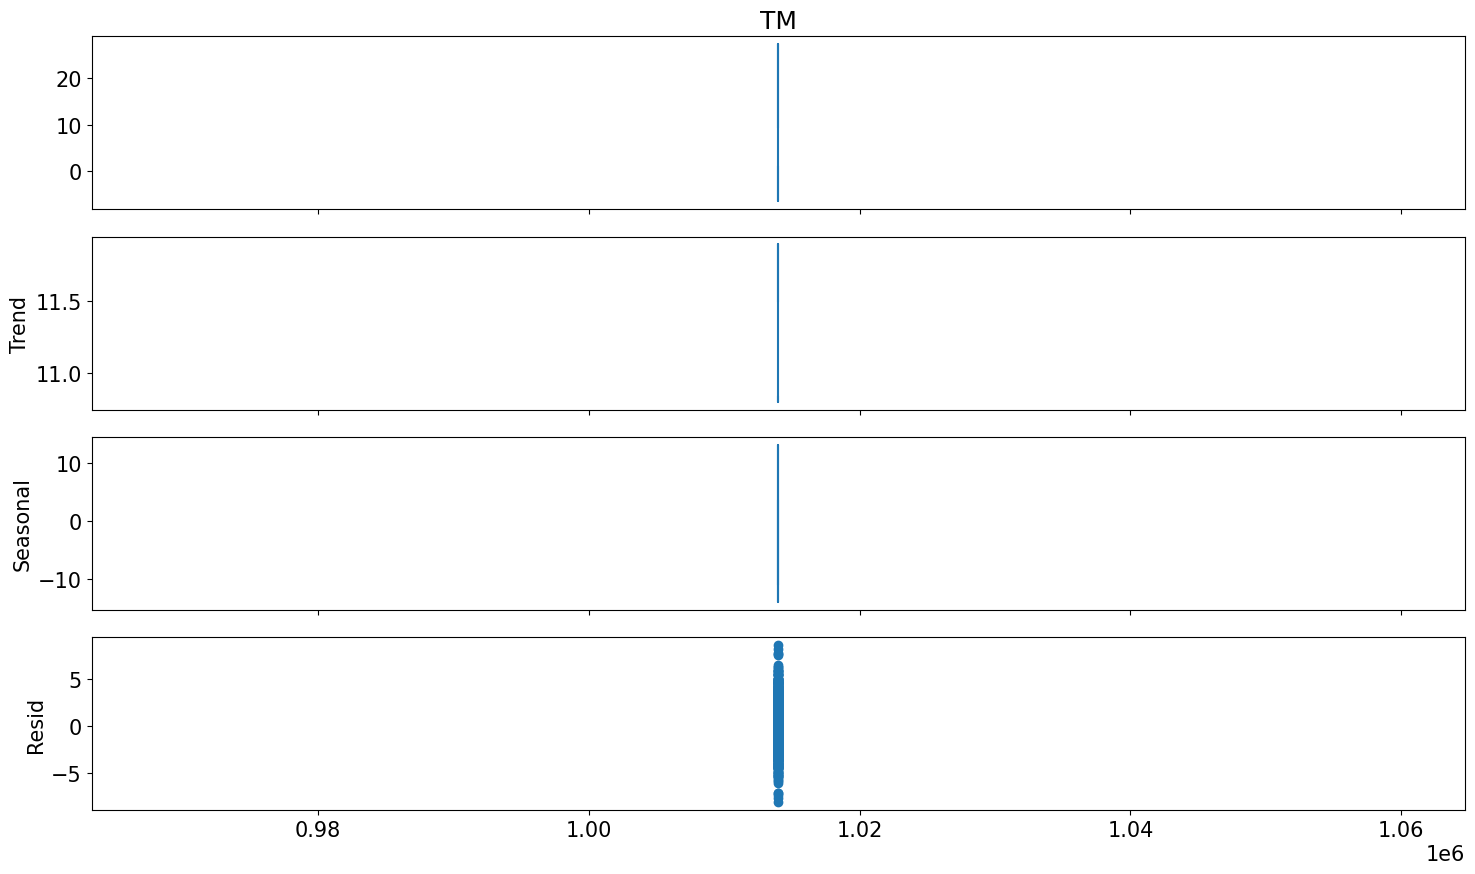

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposer la série (assurez-vous qu'elle a une fréquence définie)
result = seasonal_decompose(df_c['TM'], model='additive', period=365)  # Période 12 pour des données mensuelles
result.plot()
plt.show()


In [39]:
df_c['log_TM']=np.log(df_c['TM'])

In [ ]:
sns.lineplot(x=df_c['DATE'], y=df_c['log_TM'], label='Train')